# Max Edelstein and Jacob Snyder Final Project Spring 2019

# We will be observing Chicago Crime Data from 2017

# This file contains the data and documentation for the final project

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lets read in our .csv file
df = pd.read_csv("chicagoCrimes2017.csv")

In [3]:
# check the columns we are dealing with
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
# did this to see what columns hold quantitative data and which hold categorical
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.680230e+05,268023.000000,268022.000000,268022.000000,268023.000000,2.649830e+05,2.649830e+05,268023.0,264983.000000,264983.000000
mean,1.098160e+07,1145.510322,11.226045,23.276201,36.549998,1.164943e+06,1.886629e+06,2017.0,41.844501,-87.670219
std,5.617639e+05,699.698474,6.988473,14.147949,21.406960,1.611697e+04,3.126958e+04,0.0,0.085991,0.058675
min,2.305900e+04,111.000000,1.000000,1.000000,0.000000,1.094231e+06,1.813909e+06,2017.0,41.644606,-87.928909
25%,1.090946e+07,611.000000,6.000000,10.000000,23.000000,1.153372e+06,1.859405e+06,2017.0,41.769599,-87.712288
50%,1.101160e+07,1031.000000,10.000000,24.000000,32.000000,1.166686e+06,1.894133e+06,2017.0,41.865300,-87.664013
75%,1.110757e+07,1722.000000,17.000000,35.000000,53.000000,1.176502e+06,1.909088e+06,2017.0,41.906373,-87.627760
max,1.161427e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2017.0,42.022671,-87.524529


In [5]:
# assign all columns with quantitative data to its seperate dataframe
df_quantitative = df[["ID", "Beat", "District", "Ward", "Community Area","X Coordinate", "Y Coordinate", "Year", "Latitude", "Longitude"]]

In [6]:
# will rename columns using snake_caps and lowercase
df_quantitative.columns = ["ID", "beat", "district", "ward", "community_area", "x_coordinate", "y_coordinate", "year", "latitude", "longitude"] 

In [7]:
# check and see if the renaming worked
df_quantitative.columns

Index(['ID', 'beat', 'district', 'ward', 'community_area', 'x_coordinate',
       'y_coordinate', 'year', 'latitude', 'longitude'],
      dtype='object')

# Success, now lets get some descriptive statistics

In [8]:
# success, now lets get some descriptive statistics
df_quantitative.describe()

,ID,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,2.680230e+05,268023.000000,268022.000000,268022.000000,268023.000000,2.649830e+05,2.649830e+05,268023.0,264983.000000,264983.000000
mean,1.098160e+07,1145.510322,11.226045,23.276201,36.549998,1.164943e+06,1.886629e+06,2017.0,41.844501,-87.670219
std,5.617639e+05,699.698474,6.988473,14.147949,21.406960,1.611697e+04,3.126958e+04,0.0,0.085991,0.058675
min,2.305900e+04,111.000000,1.000000,1.000000,0.000000,1.094231e+06,1.813909e+06,2017.0,41.644606,-87.928909
25%,1.090946e+07,611.000000,6.000000,10.000000,23.000000,1.153372e+06,1.859405e+06,2017.0,41.769599,-87.712288
50%,1.101160e+07,1031.000000,10.000000,24.000000,32.000000,1.166686e+06,1.894133e+06,2017.0,41.865300,-87.664013
75%,1.110757e+07,1722.000000,17.000000,35.000000,53.000000,1.176502e+06,1.909088e+06,2017.0,41.906373,-87.627760
max,1.161427e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2017.0,42.022671,-87.524529


In [9]:
# now lets find out how many rows and columns we have
df_quantitative.shape

(268023, 10)

In [10]:
# now lets check if values are missing or are null
df_quantitative.isnull().sum()

ID                   0
beat                 0
district             1
ward                 1
community_area       0
x_coordinate      3040
y_coordinate      3040
year                 0
latitude          3040
longitude         3040
dtype: int64

# We have a lot of data munge

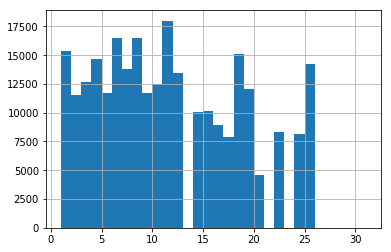

In [11]:
df_quantitative["district"].hist(bins=30)

In [12]:
# does this make sense to take the mean of a district?
# this would fill the missing/null value with that variable
# it looks like it has skew so lets use the median to replace the null values
df_quantitative["district"].median()

10.0

In [13]:
# to the median my dudes
df_quantitative["district"].fillna(df_quantitative["district"].median(), inplace=True)

C:\Users\jason\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
# did we successfully fix the district columns
df_quantitative.isnull().sum()

ID                   0
beat                 0
district             0
ward                 1
community_area       0
x_coordinate      3040
y_coordinate      3040
year                 0
latitude          3040
longitude         3040
dtype: int64

# Success but with a warning above

# Now lets deal with the null value in ward

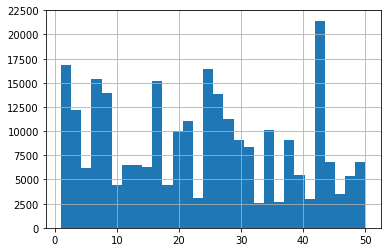

In [15]:
df_quantitative["ward"].hist(bins=30)

In [16]:
# too much skew, we must use the median
df_quantitative["ward"].median()

24.0

In [17]:
# lets fill the missing value with the median
df_quantitative["ward"].fillna(df_quantitative["ward"].median(), inplace=True)

In [18]:
df_quantitative.isnull().sum()

ID                   0
beat                 0
district             0
ward                 0
community_area       0
x_coordinate      3040
y_coordinate      3040
year                 0
latitude          3040
longitude         3040
dtype: int64

# Success, we have fixed ward

# Now we need to fix the x_coordinate

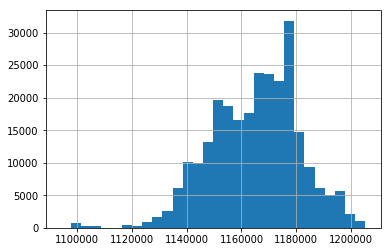

In [19]:
df_quantitative["x_coordinate"].hist(bins=30)

In [20]:
# thats a lot of skew, so lets use the median
df_quantitative["x_coordinate"].median()

1166686.0

# now we need to fill those missing values which is 3040 of them.

In [21]:
df_quantitative["x_coordinate"].fillna(df_quantitative["x_coordinate"].median(), inplace=True)

In [22]:
# now lets check to make sure that it worked
df_quantitative.isnull().sum()

ID                   0
beat                 0
district             0
ward                 0
community_area       0
x_coordinate         0
y_coordinate      3040
year                 0
latitude          3040
longitude         3040
dtype: int64

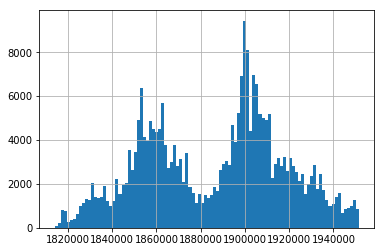

In [23]:
# now onto y-coordinate
df_quantitative["y_coordinate"].hist(bins=100)

In [24]:
# that is a horrible skew, perhaps I am handling this data incorrectly
# but I will use the median once more to fill null values
df_quantitative["y_coordinate"].fillna(df_quantitative["y_coordinate"].median(), inplace=True)

In [25]:
df_quantitative.isnull().sum()

ID                   0
beat                 0
district             0
ward                 0
community_area       0
x_coordinate         0
y_coordinate         0
year                 0
latitude          3040
longitude         3040
dtype: int64

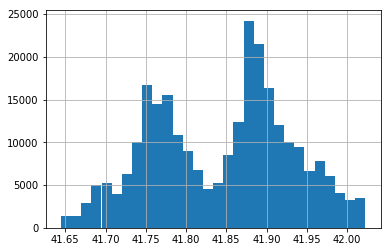

In [26]:
df_quantitative["latitude"].hist(bins=30)

In [27]:
#I will use the median again
df_quantitative["latitude"].fillna(df_quantitative["latitude"].median(), inplace=True)

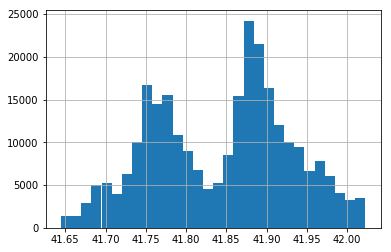

In [28]:
df_quantitative["latitude"].hist(bins=30)

# Hmmm, that is an odd skew

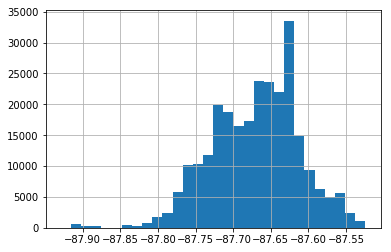

In [29]:
df_quantitative["longitude"].hist(bins=30)

# Not too much skew, so I will use the median to fill missing values

In [30]:
df_quantitative["longitude"].fillna(df_quantitative["longitude"].median(), inplace=True)

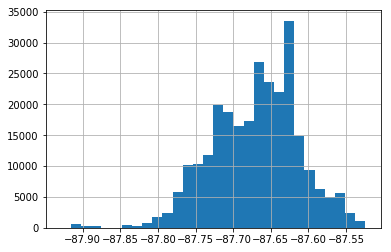

In [31]:
df_quantitative["longitude"].hist(bins=30)

In [32]:
df_quantitative.isnull().sum()

ID                0
beat              0
district          0
ward              0
community_area    0
x_coordinate      0
y_coordinate      0
year              0
latitude          0
longitude         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002051A703A20>,
      dtype=object)

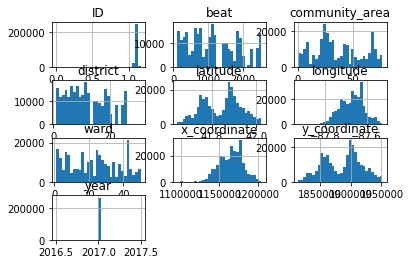

In [33]:
# I am not sure if one needs to transform the skewed data,
# I need advice on what to do
df_quantitative.hist(bins=30)

# We have taken care of "assuming correctly" the missing values properly
# Now lets deal with categorical missing values

In [34]:
# Now lets see what columns we need to place into the categorical dataframe
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [35]:
# Assign all columns with categorical data to a dataframe
df_categorical = df[["Case Number", "Date", "Block", "IUCR", "Primary Type", "Description", "Location Description", "Arrest", "Domestic", "FBI Code", "Updated On", "Location"]]

In [36]:
# rename the columns using all lower case and snake_caps
df_categorical.columns = ["case_number", "date", "block", "iucr", "primary_type", "description", "location_description", "arrest", "domestic", "fbi_code", "updated_on", "location"]

In [37]:
# check to see if renaming the columns worked
df_categorical.columns

Index(['case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'fbi_code', 'updated_on',
       'location'],
      dtype='object')

In [38]:
# success, now lets see how many rows and columns
df_categorical.shape

(268023, 12)

In [39]:
# now lets find out if any missing or null values
df_categorical.isnull().sum()

case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1040
arrest                     0
domestic                   0
fbi_code                   0
updated_on                 0
location                3040
dtype: int64

# We have data to munge, so lets start with location_description

In [40]:
df_categorical["location_description"].mode()

0    STREET
dtype: object

In [41]:
# lets fill the missing values with the most common occurring value
df_categorical["location_description"].fillna("STREET", inplace=True)

In [42]:
df_categorical.isnull().sum()

case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description       0
arrest                     0
domestic                   0
fbi_code                   0
updated_on                 0
location                3040
dtype: int64

# Onto location, the last data to munge "hopefully"

In [43]:
df_categorical["location"].mode()

0    (41.883500187, -87.627876698)
dtype: object

# I hope the above is a string

In [44]:
df_categorical["location"].fillna("(41.883500187, -87.627876698)", inplace=True)

In [45]:
df_categorical.isnull().sum()

case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
fbi_code                0
updated_on              0
location                0
dtype: int64

# Success, the bad data is clean from both df_quantitative and df_categorical

In [46]:
# now lets test to make sure that we have 22 columns, because
# df_categorical has 12 columns and df_quantitative has 10 columns = 22 columns in total
df.shape

(268023, 22)

In [47]:
# the columns are 22 which is expected, I should have done this test earlier
# but better sooner than later

In [48]:
df_quantitative.columns

Index(['ID', 'beat', 'district', 'ward', 'community_area', 'x_coordinate',
       'y_coordinate', 'year', 'latitude', 'longitude'],
      dtype='object')

In [49]:
# quick test to make sure every single value is a real value
df_quantitative.applymap(np.isreal)

,ID,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


In [50]:
df_quantitative.applymap(np.isreal)

,ID,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


# Analyzing the data

In [51]:
#counting number of incidents filed from apartments
apt_crime_count = (df_categorical["location_description"]=="APARTMENT").sum()

#counting number of incidents filed from residences
#much more incidents filed from residences than apartments
res_crime_count = (df_categorical["location_description"]=="RESIDENCE").sum()

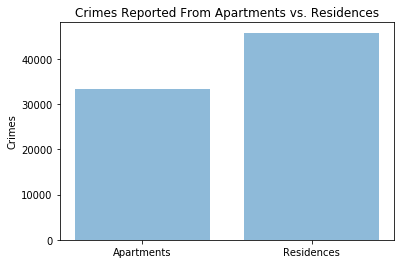

In [52]:
objects = ("Apartments", "Residences")
y_pos = np.arange(len(objects))
counts = [apt_crime_count, res_crime_count]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Crimes')
plt.title('Crimes Reported From Apartments vs. Residences')
 
plt.show()

In [53]:
#creating separate dataframe for crimes reported from apartments
#source: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas#17071908
df_apartments = df_categorical.loc[df_categorical["location_description"]=="APARTMENT"]
df_apartments.head()

,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,fbi_code,updated_on,location
2,JA491697,10/30/2017 11:52:00 AM,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,26,03/01/2018 03:52:35 PM,"(41.814669784, -87.690726696)"
15,JB147314,11/22/2017 02:42:00 AM,056XX N CHRISTIANA AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,26,02/11/2018 03:57:41 PM,"(41.883500187, -87.627876698)"
18,JB146413,01/22/2017 12:01:00 AM,079XX S JEFFERY BLVD,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,20,02/11/2018 03:57:41 PM,"(41.883500187, -87.627876698)"
20,JB147582,10/01/2017 12:00:00 AM,004XX E 71ST ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,APARTMENT,False,False,17,02/11/2018 03:57:41 PM,"(41.883500187, -87.627876698)"
22,JB147613,02/10/2017 12:00:00 PM,089XX S COTTAGE GROVE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,14,02/11/2018 03:57:41 PM,"(41.883500187, -87.627876698)"


In [54]:
#only displaying most relevant data
df_apartments = df_apartments[["location_description", "primary_type", "description", "arrest", "domestic"]]
df_apartments.head()

,location_description,primary_type,description,arrest,domestic
2,APARTMENT,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,True,False
15,APARTMENT,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,False,True
18,APARTMENT,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False
20,APARTMENT,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,False,False
22,APARTMENT,CRIMINAL DAMAGE,TO PROPERTY,False,False


In [55]:
#doing the same thing for residences
df_residences = df_categorical.loc[df_categorical["location_description"]=="RESIDENCE"]
df_residences = df_residences[["location_description", "primary_type", "description", "arrest", "domestic"]]
df_residences.head()

,location_description,primary_type,description,arrest,domestic
13,RESIDENCE,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,False,False
14,RESIDENCE,THEFT,OVER $500,False,False
16,RESIDENCE,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,False,False
17,RESIDENCE,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,False,False
30,RESIDENCE,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,False,True


In [56]:
#finding what kind of crimes are most often committed in apartments
#source:https: //stackoverflow.com/questions/15138973/how-to-get-the-number-of-the-most-frequent-value-in-a-column
df_apt_crimes = df_apartments["primary_type"].value_counts()
df_apt_crimes

BATTERY                             11706
BURGLARY                             3957
CRIMINAL DAMAGE                      3767
THEFT                                3714
ASSAULT                              2836
OTHER OFFENSE                        2471
DECEPTIVE PRACTICE                   1736
CRIMINAL TRESPASS                     664
NARCOTICS                             611
OFFENSE INVOLVING CHILDREN            522
CRIM SEXUAL ASSAULT                   420
WEAPONS VIOLATION                     281
ROBBERY                               235
SEX OFFENSE                           151
PUBLIC PEACE VIOLATION                 83
MOTOR VEHICLE THEFT                    70
HOMICIDE                               45
ARSON                                  36
STALKING                               27
OBSCENITY                              18
INTIMIDATION                           16
KIDNAPPING                             14
INTERFERENCE WITH PUBLIC OFFICER       10
LIQUOR LAW VIOLATION              

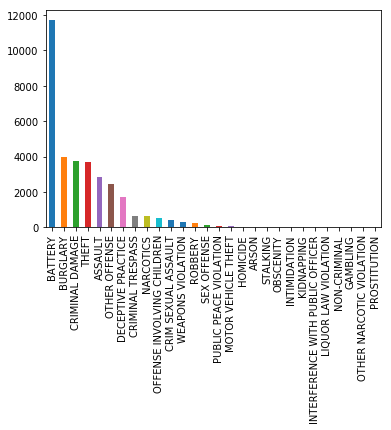

In [57]:
#plotting the different crime types
df_apt_crimes.plot(kind="bar")

In [58]:
#doing same for residences
df_res_crimes = df_residences["primary_type"].value_counts()
df_res_crimes

BATTERY                             10134
OTHER OFFENSE                        6693
DECEPTIVE PRACTICE                   6147
CRIMINAL DAMAGE                      5521
THEFT                                5046
BURGLARY                             4170
ASSAULT                              3189
OFFENSE INVOLVING CHILDREN           1180
CRIMINAL TRESPASS                     852
NARCOTICS                             729
CRIM SEXUAL ASSAULT                   473
WEAPONS VIOLATION                     416
MOTOR VEHICLE THEFT                   307
SEX OFFENSE                           266
ROBBERY                               234
PUBLIC PEACE VIOLATION                103
ARSON                                  75
INTIMIDATION                           58
STALKING                               55
OBSCENITY                              49
KIDNAPPING                             45
INTERFERENCE WITH PUBLIC OFFICER       18
NON-CRIMINAL                           10
HUMAN TRAFFICKING                 

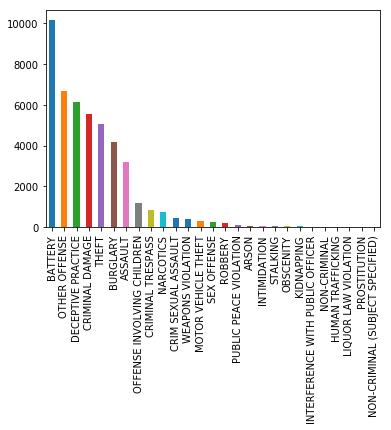

In [59]:
df_res_crimes.plot(kind="bar")

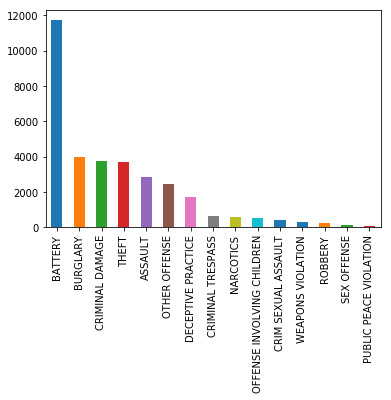

In [60]:
#only plotting the top 15 crimes reported from apartments to make graph more readable
apt_crimes = df_apt_crimes.drop(df_apt_crimes.index[15:])
apt_crimes.plot(kind="bar")

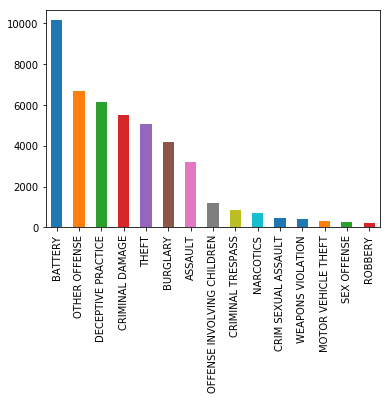

In [61]:
#doing same for crimes from residences
#battery doesn't make up as big of a majority of crimes when compared to apartments
#burglary and theft also aren't as high-ranking in the list of crimes reported from residences as from apartments
res_crimes = df_res_crimes.drop(df_res_crimes.index[15:])
res_crimes.plot(kind="bar")

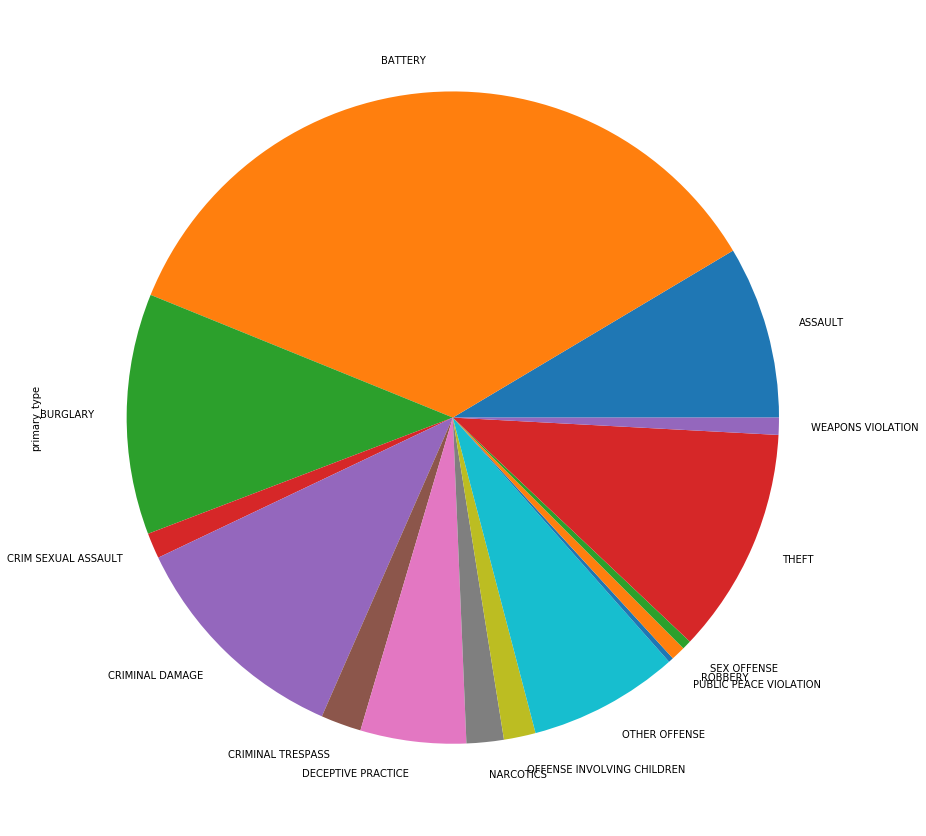

In [62]:
#pie chart that shows the proportion of each crime type committed in apartments
apt_crimes.sort_index().plot.pie(y='Crime Types', subplots=False, figsize=(30, 15))

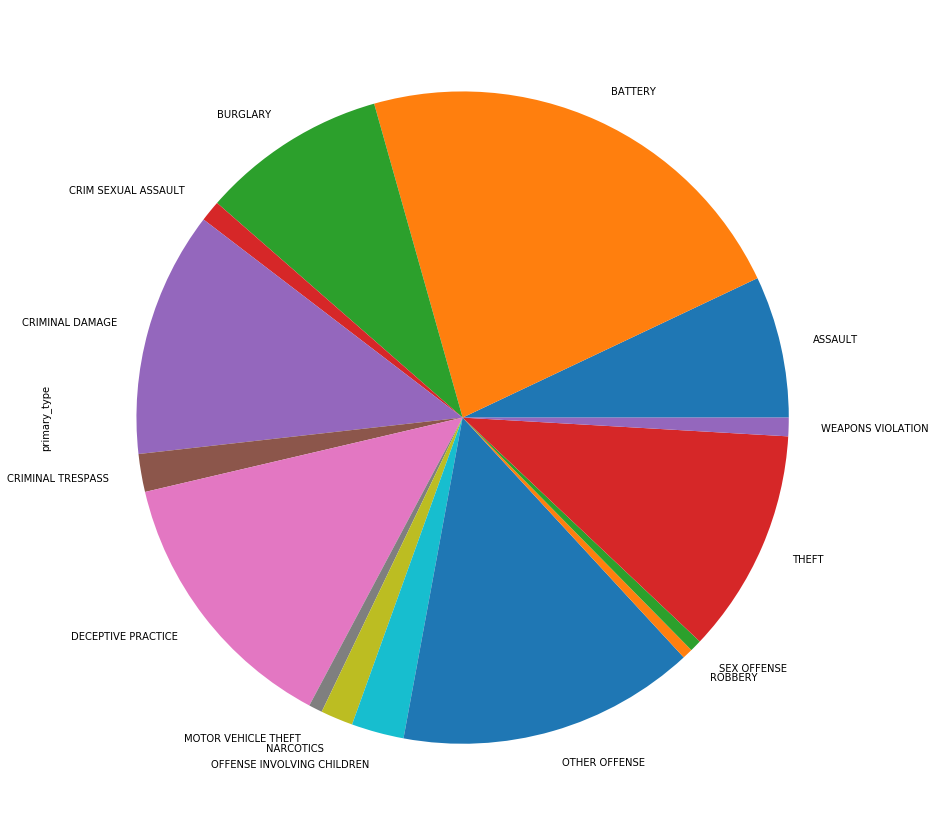

In [63]:
res_crimes.sort_index().plot.pie(y='Crime Types', subplots=False, figsize=(30, 15))

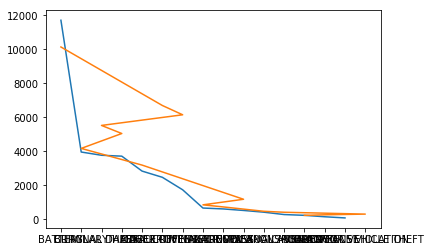

In [64]:
#This is meant to be a side-by-side comparison of the bars for apartments and residences
#from the previous bar charts. Can't figure it out at this time
plt.plot(apt_crimes)
plt.plot(res_crimes)
plt.show()